# 1.0 Library and Dependencies

In [23]:
import tensorflow as tf
import keras.api._v2.keras as keras
import numpy as np
import cv2
import imghdr
from matplotlib import pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

# 2.0 Load Data & Inspection

In [13]:
data = keras.utils.image_dataset_from_directory('datasets')

Found 40000 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

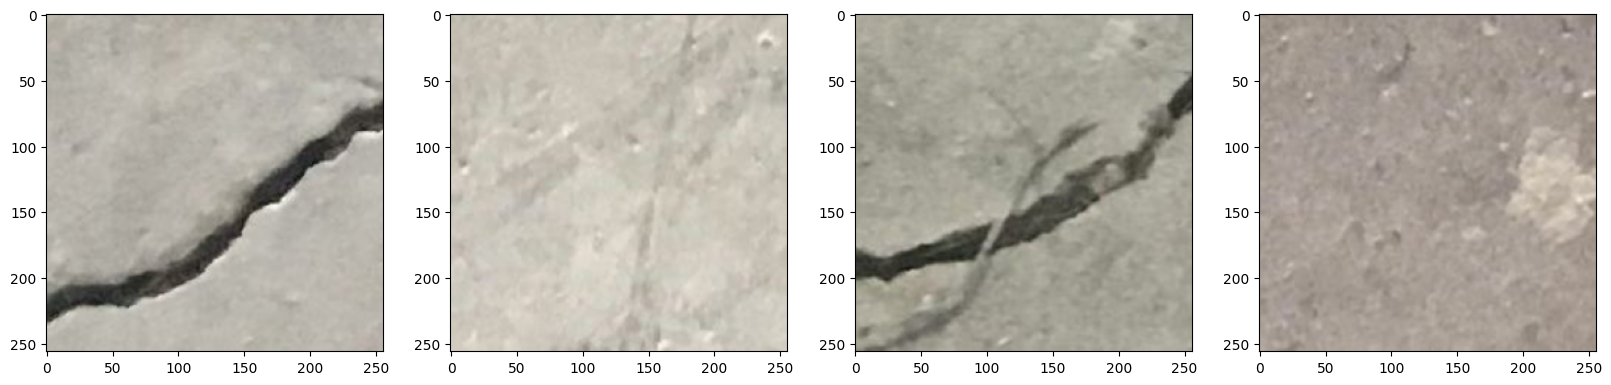

In [16]:
# Display some image data
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set

# 3.0 Data Cleaning and Preprocessing

## 3.1 Scale the Data into fixed size

In [17]:
# 
data = data.map(lambda x,y: (x/255,y))

In [18]:
# Show the image data as Tensorflow data
data.as_numpy_iterator().next()

(array([[[[0.7372549 , 0.7137255 , 0.65882355],
          [0.73399967, 0.71047026, 0.6555683 ],
          [0.73333335, 0.70980394, 0.654902  ],
          ...,
          [0.7602635 , 0.72889096, 0.6857537 ],
          [0.7456878 , 0.71431524, 0.671178  ],
          [0.7294118 , 0.69803923, 0.654902  ]],
 
         [[0.71772367, 0.69419426, 0.6392923 ],
          [0.7171705 , 0.69364107, 0.6387391 ],
          [0.721724  , 0.69819456, 0.6432926 ],
          ...,
          [0.70025826, 0.6688857 , 0.62574846],
          [0.6909024 , 0.65952986, 0.6163926 ],
          [0.6773284 , 0.64595586, 0.6028186 ]],
 
         [[0.7109145 , 0.6873851 , 0.6324831 ],
          [0.71324784, 0.6897184 , 0.63481647],
          [0.71733254, 0.69380313, 0.6389012 ],
          ...,
          [0.64660645, 0.6152339 , 0.57209665],
          [0.6417669 , 0.61039436, 0.5672571 ],
          [0.635746  , 0.60437346, 0.5612362 ]],
 
         ...,
 
         [[0.62182903, 0.5904565 , 0.54731923],
          [0.62926

# 4.0 Train, Validation, Test Split

In [19]:
train_size= int(len(data)*.7)
val_size = int(len(data)*2) # for tuning parameters like number of hidden layers/picking the best model
test_size = int(len(data)*.1) # solely for getting the performance of the model

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 5.0 Building the Deep Learning Model

In [21]:
# Inspect the shape of input data for input layer
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary() # to see the overall structure of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

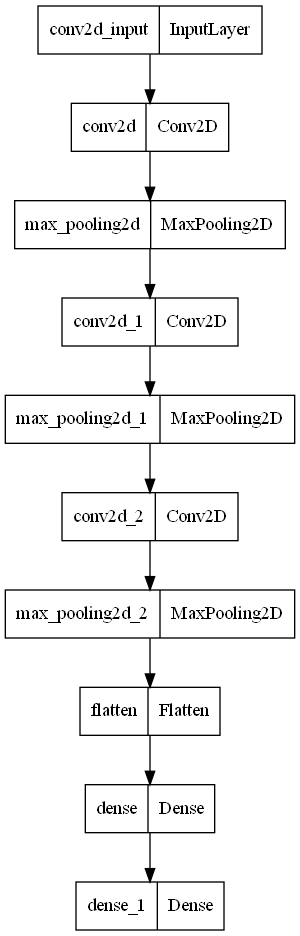

In [28]:
keras.utils.plot_model(model)

# 6.0 Compile and Fit Model

In [32]:
# Set Tensorboard for training progress check
logdir = 'logs'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
# Set Early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=2)

In [29]:
# Compile model with loss func of BinaryCrossentropy and matrics of accuracy
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
# Fit model
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[early_stopping, tensorboard_callback])

Epoch 1/15
875/875 [==============================] - 1131s 1s/step - loss: 0.1318 - accuracy: 0.9564 - val_loss: 0.0466 - val_accuracy: 0.9833
Epoch 2/15
875/875 [==============================] - 1010s 1s/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0500 - val_accuracy: 0.9874
Epoch 3/15
875/875 [==============================] - 1025s 1s/step - loss: 0.0367 - accuracy: 0.9895 - val_loss: 0.0329 - val_accuracy: 0.9881
Epoch 4/15
875/875 [==============================] - 1109s 1s/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0184 - val_accuracy: 0.9938
Epoch 5/15
875/875 [==============================] - 1058s 1s/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.0228 - val_accuracy: 0.9930
Epoch 6/15
875/875 [==============================] - 955s 1s/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0283 - val_accuracy: 0.9929


# 7.0 Plot Performance

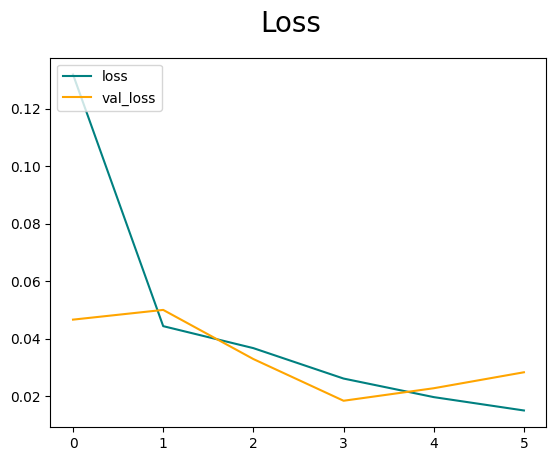

In [34]:
# Loss and Validation Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

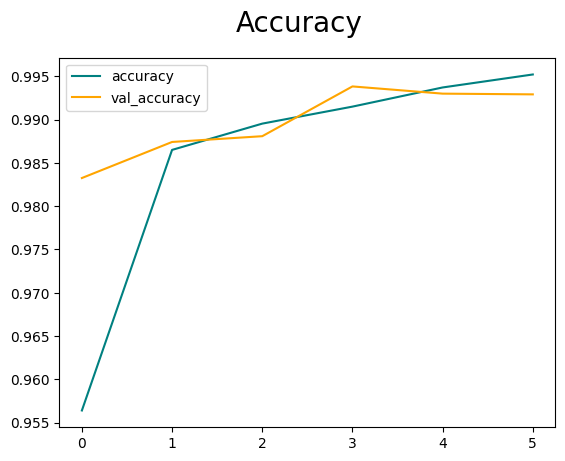

In [35]:
# Accuracy and Validation Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 8.0 Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.uupdate_state(y, yhat)
    acc.update_state(y, yhat)

In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 9.0 Test Model with new data

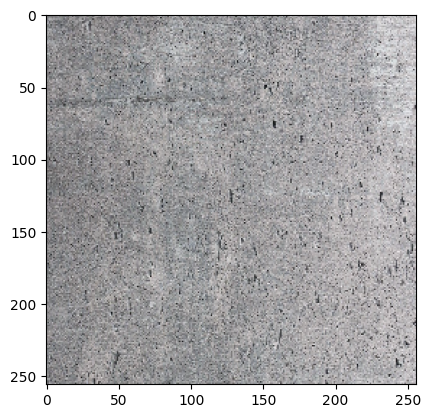

In [48]:
img1 = cv2.imread('concrete.jpg')
resize1 = tf.image.resize(img1, (256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [49]:
detect1 = model.predict(np.expand_dims(resize1/255,0))

1/1 [==============================] - 0s 47ms/step


In [50]:
detect1

array([[0.00082504]], dtype=float32)

In [51]:
if detect1 > 0.5:
    print(f"Concrete Crack Detected")
else:
    print(f'No Concrete Crack')

No Concrete Crack


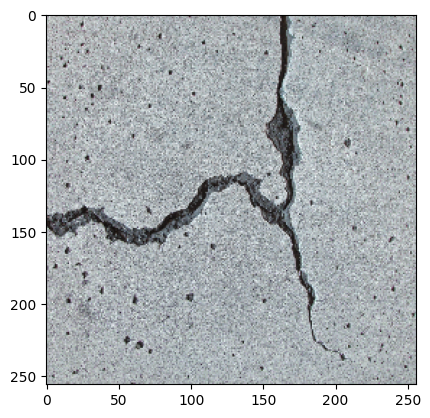

In [52]:
img2 = cv2.imread('Cracks.jpg')
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [53]:
detect2 = model.predict(np.expand_dims(resize2/255,0))

1/1 [==============================] - 0s 41ms/step


In [54]:
if detect2 > 0.5:
    print(f"Concrete Crack Detected")
else:
    print(f'No Concrete Crack')

Concrete Crack Detected


# 10.0 Save the Model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models','ConcreteCrackClassifier.h5'))


In [ ]:
new_model = load_model('./models/ConcreteCrackClassifier.h5')